# 数据可视化
1.用matplotlib简单绘图<br/>
2.对数图<br/>
3.散点图<br/>
4.图例和注解<br/>
5.pandas绘图<br/>
6.时滞图<br/>
7.自相关图

## 用matplotlib简单绘图

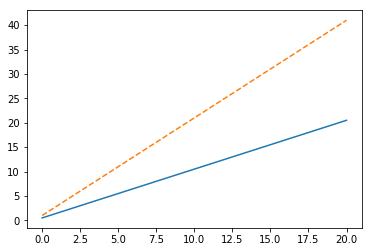

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0,20)#linspace()函数指定横坐标范围  
plt.plot(x,.5+x)
plt.plot(x,1+2*x,'--')
plt.show()

## 对数图

所谓对数图，实际上就是使用对数坐标绘制的图形。对于对数刻度来说，<br/>
其间隔表示的是变量的值在数量级上的变化，这与线性刻度有很大的不同。<br/>
对数图又分为两种不同的类型，其中一种称为双对数图，它的特点是两个坐<br/>
标轴都采用对数刻度，对应的matplotlibh函数是matplotlib.pyplot中的loglog()。<br/>
半对数图的一个坐标轴采用线性刻度，另一个坐标轴使用对数刻度，它对应的matplotlib API<br/>
是semilogx()函数和semilogy()函数，在双对数图上，幂律表现为直线；在半对数图上，直<br/>
线则代表的是指数律。<br/>
摩尔定律大意为集成电路上晶体管的数量每两年增加一倍。<br/>
在https://en.wikipedia.org/wiki/Transistor_count#Microprocessors  <br/>
页面有一个数据表，记录了不同年份微处理器上晶体管的数量。我们为这些数据制作一个<br/>
CSV文件，名为transcount.csv,其中只包含晶体管数量和年份值。

Poly [ 3.51232166e-01 -6.85246923e+02]


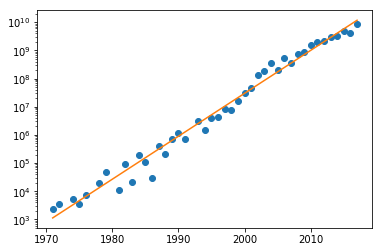

In [11]:
#对数图
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.read_csv('transcount.csv')
df=df.groupby('year').aggregate(np.mean) #按年份分组，以数量均值聚合 
years=df.index.values#得到所有年份信息 
counts=df['trans_count'].values#用.values取出来变成一个数组，不用的话取出来是一个序列
poly=np.polyfit(years,np.log(counts),deg=1)#polyfit（）表示用多项式拟合数据，deg=1表示多项式次数为1, #线性拟合数据  
print("Poly",poly)#输出拟合的系数
plt.semilogy(years,counts,'o')#绘制对数坐标图
plt.semilogy(years,np.exp(np.polyval(poly,years)))#polyval（）对多项式进行评估
plt.show()

## 散点图

散点图可以形象展示直角坐标系中两个变量之间的关系，每个数据点<br/>
的位置实际上就是两个变量的值。泡式图是对散点图的一种扩展。在<br/>
泡式图中，每个数据点都被一个气泡所包围，它由此得名；而第三个<br/>
变量的值正好可以用来确定气泡的相对大小。<br/>
在https://en.wikipedia.org/wiki/Transistor_count<br/>
GPU页面上，有个记录GPU晶体数量的数据表，我们用这些晶<br/>
体管数量年份数据新建表gpu_transcount.csv。借助matplotlib API提<br/>
供的scatter()函数绘制散点图。

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.read_csv('transcount.csv')

In [13]:
df

,year,trans_count,gpu_trans_count
0,1971,2300,NaN
1,1972,3500,NaN
2,1974,4500,NaN
3,1974,4100,NaN
4,1974,5000,NaN
5,1974,8000,NaN
6,1975,3510,NaN
7,1976,6500,NaN
8,1976,8500,NaN
9,1978,29000,NaN


In [19]:
#散点图
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
df=pd.read_csv('transcount.csv')
df=df.groupby('year').aggregate(np.mean)
gpu=pd.read_csv('gpu_transcount.csv')
gpu=gpu.groupby('year').aggregate(np.mean)

In [23]:
df=pd.merge(df,gpu,how='outer',left_index=True,right_index=True)#合并数据，并保留两个表的所有信息
df=df.replace(np.nan,0)#将缺失值或为0
print(df)

       trans_count  gpu_trans_count_x  gpu_trans_count_y  gpu_trans_count
year                                                                     
1971  2.300000e+03       0.000000e+00       0.000000e+00     0.000000e+00
1972  3.500000e+03       0.000000e+00       0.000000e+00     0.000000e+00
1974  5.400000e+03       0.000000e+00       0.000000e+00     0.000000e+00
1975  3.510000e+03       0.000000e+00       0.000000e+00     0.000000e+00
1976  7.500000e+03       0.000000e+00       0.000000e+00     0.000000e+00
1978  1.900000e+04       0.000000e+00       0.000000e+00     0.000000e+00
1979  4.850000e+04       0.000000e+00       0.000000e+00     0.000000e+00
1981  1.150000e+04       0.000000e+00       0.000000e+00     0.000000e+00
1982  9.450000e+04       0.000000e+00       0.000000e+00     0.000000e+00
1983  2.200000e+04       0.000000e+00       0.000000e+00     0.000000e+00
1984  1.900000e+05       0.000000e+00       0.000000e+00     0.000000e+00
1985  1.053333e+05       0.000000e+00 

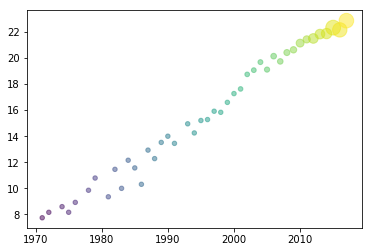

In [24]:
years=df.index.values#因为用year做了分组，所以year成了唯一的index
counts=df['trans_count'].values
gpu_counts=df['gpu_trans_count'].values
cnt_log=np.log(counts)
plt.scatter(years,cnt_log,c=200*years,s=20+200*gpu_counts/gpu_counts.max(),alpha=0.5)#c指定气泡颜色，s设定气泡大小
plt.show()

## 图例和注解

要想做出让人眼前一亮的神图，图例和注解肯定是少不了的。一般情况下，数据图都带有下列辅助信息。<br/>
用来描述图中各数据序列的图例，matplotlib提供的legend()函数可以为每个数据序列提供相应的标签。<br/>
对图中要点的注解。可以借助matplotlib提供的annotate()函数。<br/>
横轴和纵轴的标签，可以通过xlabel()和ylabel()绘制出来。<br/>
一个说明性质的标题，通常由matplotlib的title函数来提供。<br/>
网格，对于轻松定位数据点非常有帮助。grid()函数可以用来决定是否使用网格。

In [154]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.read_csv('transcount.csv')
df=df.groupby('year').aggregate(np.mean)
gpu=pd.read_csv('gpu_transcount.csv')
gpu=gpu.groupby('year').aggregate(np.mean)
df=pd.merge(df,gpu,how='outer',left_index=True,right_index=True)
df=df.replace(np.nan,0)
years=df.index.values
counts=df['trans_count'].values

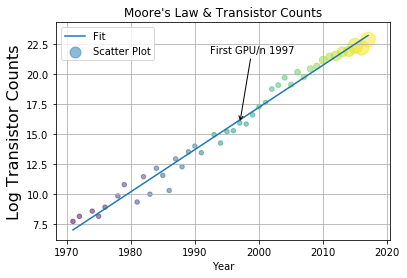

In [41]:
poly=np.polyfit(years,np.log(counts),deg=1)
plt.plot(years,np.polyval(poly,years),label='Fit')
gpu_start=gpu.index.values.min()
y_ann=np.log(df.at[gpu_start,'trans_count'])
ann_str="First GPU/n %d" % gpu_start#把gpu_start赋给ann_str并显示First GPU/n
plt.annotate(ann_str,xy=(gpu_start,y_ann),arrowprops=dict(arrowstyle="->"),xytext=(-30,+70),textcoords="offset points")
cnt_log=np.log(counts)
plt.scatter(years,cnt_log,c=200*years,s=20+200*gpu_counts/gpu_counts.max(),alpha=0.5,label="Scatter Plot")
plt.legend(loc='upper left')#显示图例，loc表示位置，即图例放在左上角
plt.grid() #显示网格
plt.xlabel("Year")#设置横轴标签
plt.ylabel("Log Transistor Counts",fontsize=16)#设置纵轴标签
plt.title("Moore's Law & Transistor Counts")#设置题目
plt.show()

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.read_csv('transcount.csv')
df=df.groupby('year').aggregate(np.mean)
gpu=pd.read_csv('gpu_transcount.csv')
gpu=gpu.groupby('gpu_trans_count').aggregate(np.mean)
# df=pd.merge(df,gpu,how='outer',left_index=True,right_index=True)
# df=df.replace(np.nan,0)
# years=df.index.values
# counts=df['trans_count'].values

In [43]:
years=gpu['year'].values

In [44]:
years

array([1997. , 1999. , 1999. , 2000. , 1999. , 2000. , 2000. , 2001. ,
       2001. , 2002. , 2002. , 2003. , 2003. , 2004. , 2007.5, 2004. ,
       2008. , 2009. , 2007. , 2010.5, 2005. , 2008. , 2005. , 2011. ,
       2006. , 2009. , 2008. , 2008. , 2011. , 2010. , 2008. , 2006. ,
       2007. , 2011. , 2009. , 2007. , 2009. , 2008. , 2008. , 2011. ,
       2010. , 2012. , 2008. , 2012. , 2010. , 2017. , 2014. , 2011. ,
       2013. , 2009. , 2017. , 2012. , 2010. , 2012. , 2014. , 2013. ,
       2010. , 2017. , 2012. , 2011. , 2016. , 2014. , 2014. , 2016. ,
       2013. , 2012. , 2016. , 2015. , 2015. , 2016. , 2017. , 2016. ,
       2017. ])

In [45]:
type(years)

numpy.ndarray

## pandas绘图

In [160]:
#pandas绘图
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.read_csv('transcount.csv')
df=df.groupby('year').aggregate(np.mean)

D:\Python\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


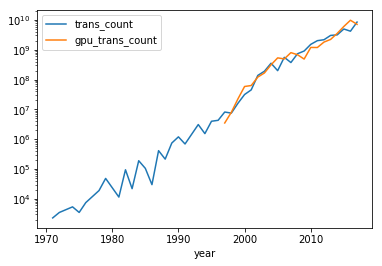

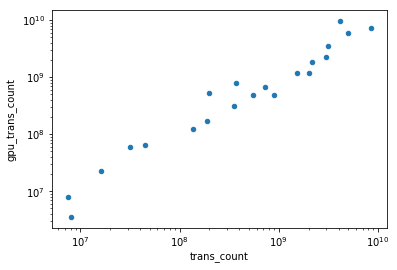

In [161]:
df.plot(logy=True)
df[df['gpu_trans_count']>0].plot(kind='scatter',x='trans_count',y='gpu_trans_count',loglog=True)
plt.show()

## 时滞图

时滞图实际上就是一个散点图，只不过把时间序列的图像及相同序列在时间轴上<br/>
后延图像放一起展示而已。例如，我们可以利用这种图考察今年的CPU晶体管数<br/>
量与上一年度CPU晶体管数量之间的相关性。可以利用pandas字库<br/>
pandas.tools.plotting中的lag_plot()函数来绘制时滞图，滞默认为1。

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  if sys.path[0] == '':


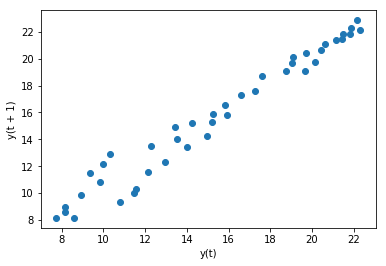

In [164]:
#时滞图
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from pandas.tools.plotting import lag_plot
df=pd.read_csv('transcount.csv')
df=df.groupby('year').aggregate(np.mean)
gpu=pd.read_csv('gpu_transcount.csv')
gpu=gpu.groupby('year').aggregate(np.mean)
df=pd.merge(df,gpu,how='outer',left_index=True,right_index=True)
df=df.replace(np.nan,0) 
lag_plot(np.log(df['trans_count']))
plt.show()

## 自相关图

自相关图描述的是时间序列在不同时间延迟情况下的自相关性。所谓自相关，<br/>
就是一个时间序列与相同数据在不同时间延迟情况下的相互关系。利用<br/>
pandas子库pandas.tools.plotting 中的autocorrelation_plot()函数，<br/>
就可以画出自相关图了。

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  # This is added back by InteractiveShellApp.init_path()


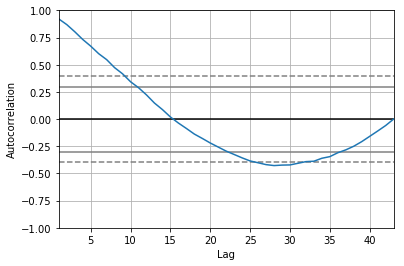

In [166]:
#自相关图
import pandas as pd
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
df=pd.read_csv('transcount.csv')
df=df.groupby('year').aggregate(np.mean)
gpu=pd.read_csv('gpu_transcount.csv')
gpu=gpu.groupby('year').aggregate(np.mean)
df=pd.merge(df,gpu,how='outer',left_index=True,right_index=True)
df=df.replace(np.nan,0)
autocorrelation_plot(np.log(df['trans_count']))#用自相关函数绘制自相关图
plt.show()

从图中可以看出，较之于时间上越远（即时间延迟越大）的数值，<br/>
当前的数值与时间上越接近（及时间延迟越小）的数值相关性越大；<br/>
当时间延迟极大时，相关性为0